# ０．準備

In [152]:
#株価の時系列データの予測モデル構築
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [153]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [154]:
with open('/content/drive/MyDrive/業務体験課題/assignment-main/Trainee/time-series-prediction/stock_price.csv') as f:
  df = pd.read_csv(f, index_col=None, parse_dates=True)

# １．EDA

In [155]:
df.head()

,日付け,終値,始値,高値,安値,出来高,変化率 %
0,2024-08-01,156.3,159.3,159.4,156.1,79.15M,-2.56%
1,2024-07-31,160.4,158.2,160.7,158.1,173.91M,1.07%
2,2024-07-30,158.7,158.8,159.2,158.0,138.14M,-0.63%
3,2024-07-29,159.7,158.7,160.2,158.4,126.28M,1.14%
4,2024-07-26,157.9,159.3,159.6,157.9,155.08M,-0.13%


In [156]:
df.tail()

,日付け,終値,始値,高値,安値,出来高,変化率 %
9197,1987-02-18,191.2,186.3,191.2,186.3,795.09M,4.82%
9198,1987-02-17,182.4,176.5,184.3,175.5,881.51M,3.93%
9199,1987-02-16,175.5,166.7,175.5,165.7,360.51M,1.74%
9200,1987-02-13,172.5,176.5,176.5,172.5,422.38M,-5.43%
9201,1987-02-12,182.4,182.4,182.4,182.4,1.28B,16.25%


In [157]:
#各データの型を確認
df.dtypes

,0
日付け,object
終値,float64
始値,float64
高値,float64
安値,float64
出来高,object
変化率 %,object


In [158]:
#欠損値の確認
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9202 entries, 0 to 9201
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   日付け     9202 non-null   object 
 1   終値      9202 non-null   float64
 2   始値      9202 non-null   float64
 3   高値      9202 non-null   float64
 4   安値      9202 non-null   float64
 5   出来高     9202 non-null   object 
 6   変化率 %   9202 non-null   object 
dtypes: float64(4), object(3)
memory usage: 503.4+ KB


In [159]:
#列名を英語に変換
df = df.rename(columns={
    df.columns[0]: 'date',
    df.columns[1]: 'close',
    df.columns[2]: 'open',
    df.columns[3]: 'high',
    df.columns[4]: 'low',
    df.columns[5]: 'volume',
    df.columns[6]: 'cr'
})

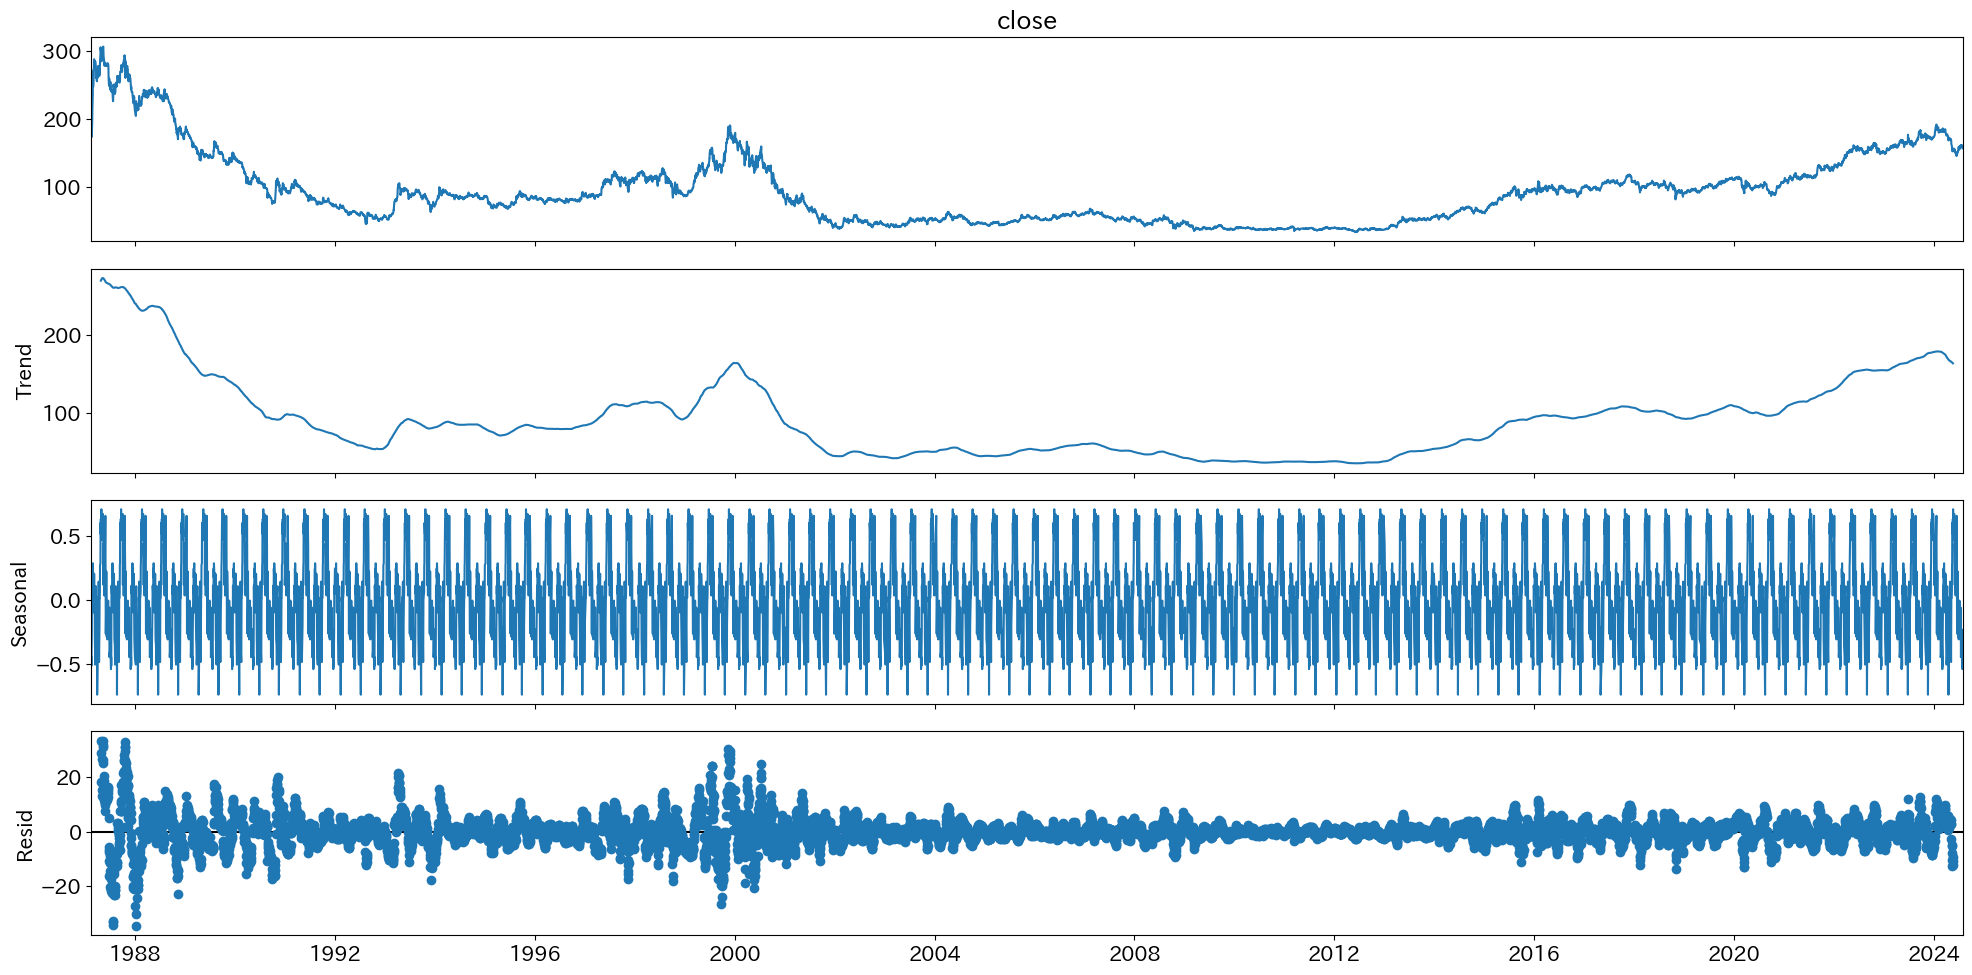

In [160]:
#smをインポート
import statsmodels.api as sm

# Dataをインデックスに設定
time_series = df.copy()
time_series["date"] = pd.to_datetime(df['date'])
time_series = time_series.set_index(['date']).sort_index(ascending=True)

# 表示サイズ調整
plt.rcParams["figure.figsize"] = [20,10]
plt.rcParams["font.size"] = 15

# 原系列、傾向（トレンド）、季節変動（季節性）、不規則変動（残差）
def plt_seasonal_decompose(df, col_name, period):
    res = sm.tsa.seasonal_decompose(df[col_name], period=period)
    fig = res.plot()
    plt.show()

# 原系列をインプットして確認
plt_seasonal_decompose(time_series, col_name='close', period=100)

<ipython-input-161-d3c515149367>:10: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  sm.graphics.tsa.plot_acf(df.resample(cicle)[feature].sum(), title=feature, lags=lags)
<ipython-input-161-d3c515149367>:10: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  sm.graphics.tsa.plot_acf(df.resample(cicle)[feature].sum(), title=feature, lags=lags)


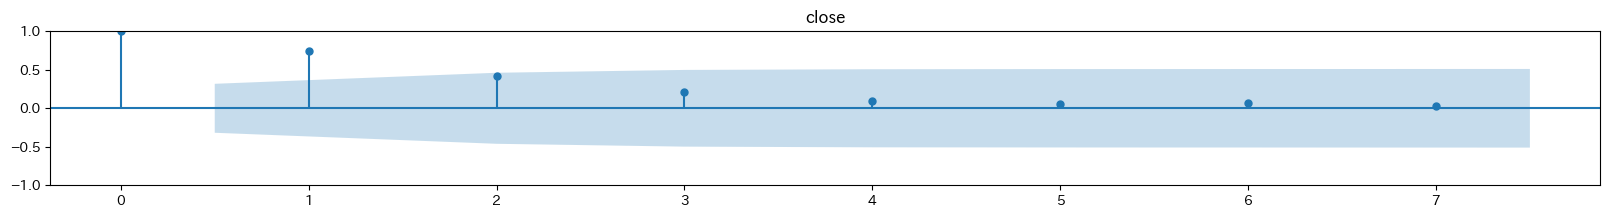

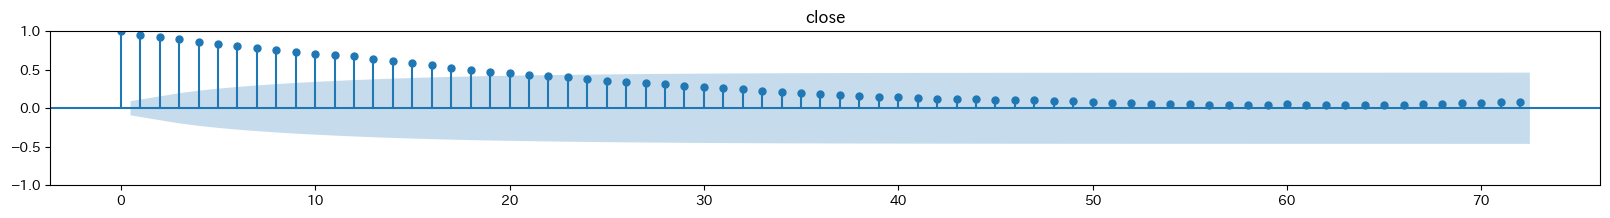

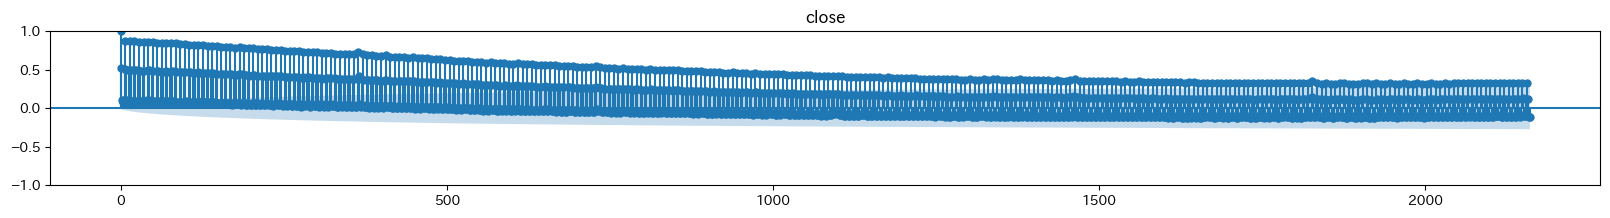

In [161]:
# 表示サイズ調整
plt.rcParams["figure.figsize"] = [20,2]
plt.rcParams["font.size"] = 10

# コレログラム
def correlogram(cicle, lags, df, feature):
    # 'date'列をdatetimeIndexに変換
    df['date'] = pd.to_datetime(df['date']) #'date'列をdatetime型に変換
    df = df.set_index('date') #'date'列をインデックスに設定
    sm.graphics.tsa.plot_acf(df.resample(cicle)[feature].sum(), title=feature, lags=lags)

# まずは原系列をインプットして確認
correlogram(cicle='Y', lags='7', df=df, feature='close') # 年ベース
correlogram(cicle='M', lags=str(12*6), df=df, feature='close') # 月ベース
correlogram(cicle='D', lags=str(30*12*6), df=df, feature='close') # 日ベース

<ipython-input-162-9bee14fea19b>:10: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  sm.graphics.tsa.plot_pacf(df.resample(cicle)[feature].sum(), title=feature, lags=lags)
<ipython-input-162-9bee14fea19b>:10: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  sm.graphics.tsa.plot_pacf(df.resample(cicle)[feature].sum(), title=feature, lags=lags)


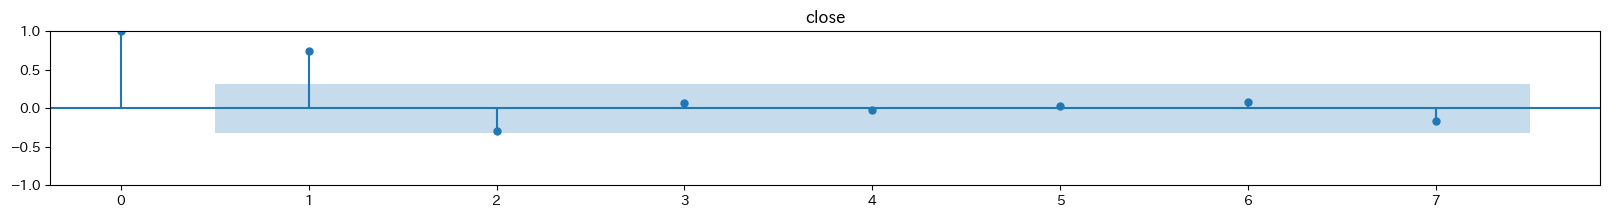

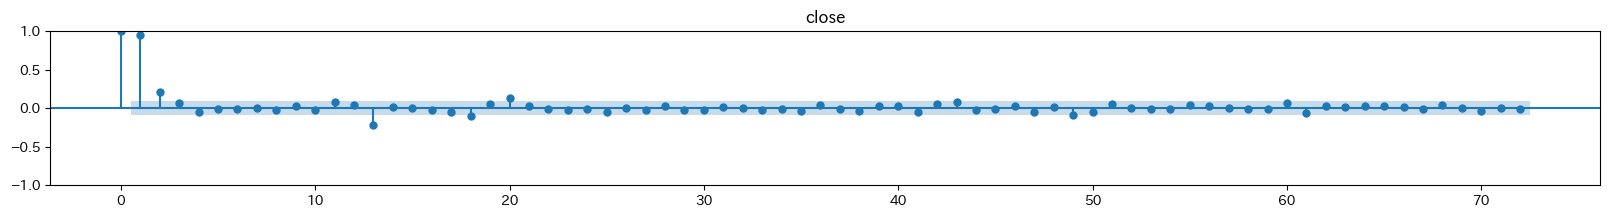

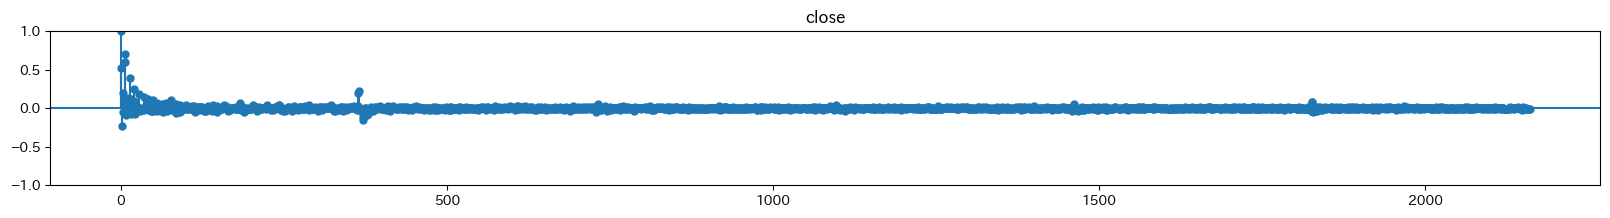

In [162]:
# 表示サイズ調整
plt.rcParams["figure.figsize"] = [20,2]
plt.rcParams["font.size"] = 10

# コレログラム
def correlogram(cicle, lags, df, feature):
    # 'date'列をdatetimeIndexに変換
    df['date'] = pd.to_datetime(df['date']) #'date'列をdatetime型に変換
    df = df.set_index('date') #'date'列をインデックスに設定
    sm.graphics.tsa.plot_pacf(df.resample(cicle)[feature].sum(), title=feature, lags=lags)

# まずは原系列をインプットして確認
correlogram(cicle='Y', lags='7', df=df, feature='close') # 年ベース
correlogram(cicle='M', lags=str(12*6), df=df, feature='close') # 月ベース
correlogram(cicle='D', lags=str(30*12*6), df=df, feature='close') # 日ベース

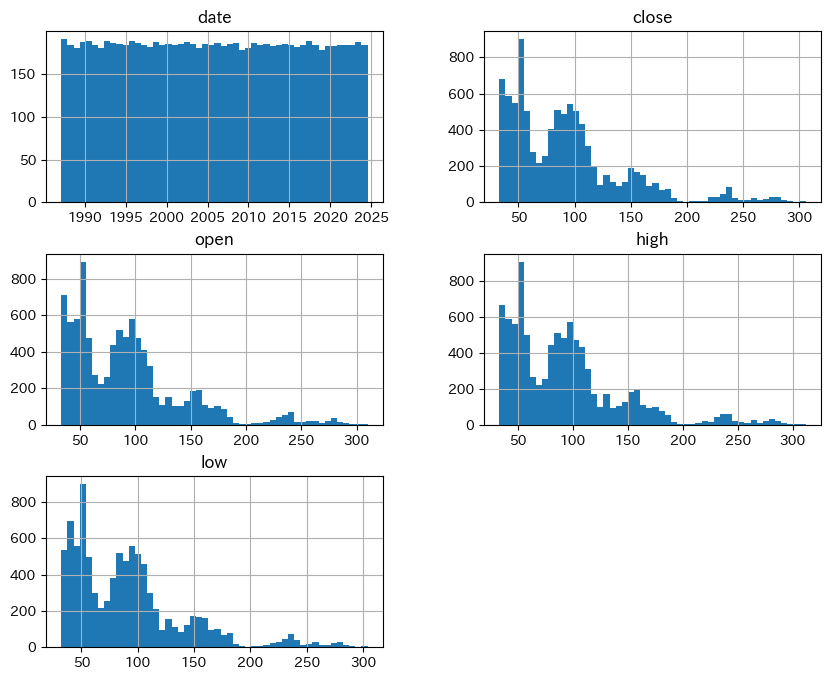

In [163]:
#ヒストグラム
df.hist(bins=50, figsize=(10,8))
plt.show()

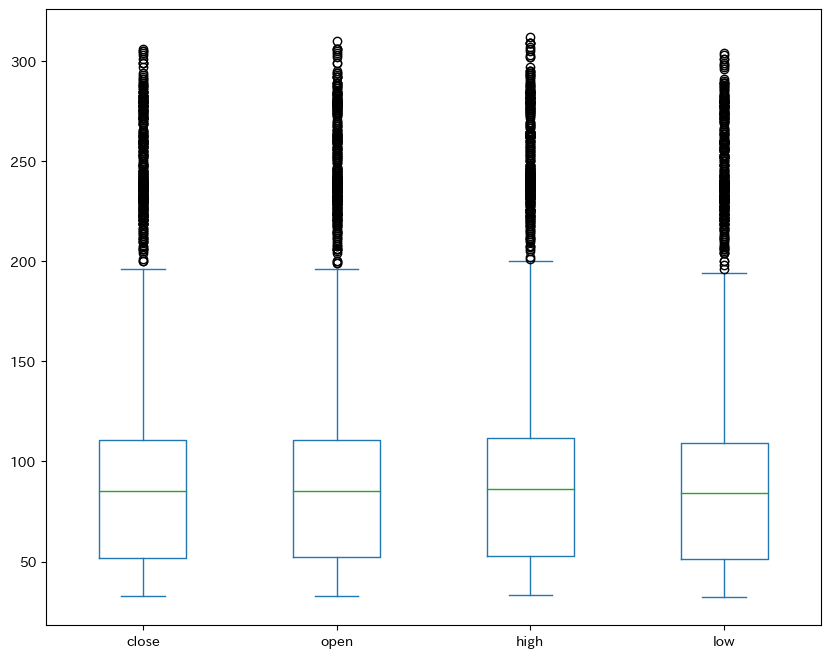

In [164]:
#箱ひげ図
df.plot(kind="box", figsize=(10,8))
plt.show()

# ２．前処理

In [165]:
#インデックスはそのままでデータを逆順に変換
df = df.sort_index(ascending=False)
df = df.reset_index(drop=True)

In [166]:
#単位を削除し浮動小数点型に変換
#d+は整数部分の数字。\.?は小数点がある場合に抽出。\d*は小数部分がある場合に抽出
df["volume"] = df["volume"].str.extract('(\d+\.?\d*)').astype(float)
df["cr"] = df["cr"].str.extract('(\d+\.?\d*)').astype(float)

In [167]:
#日付をdatetime型に変換
df['date'] = pd.to_datetime(df['date'])

In [168]:
#日付から周期性(年単位)を検出

def create_yearly_trigonometric_data(df):

    df['days_in_year'] = 365
    df['day_of_year'] = df['date'].dt.dayofyear

    # 年周期の三角関数
    df['sin_year'] = np.sin(2 * np.pi * (df['day_of_year'] - 1) / df['days_in_year'])
    df['cos_year'] = np.cos(2 * np.pi * (df['day_of_year'] - 1) / df['days_in_year'])

    return df

# 年周期の三角関数データを作成
df = create_yearly_trigonometric_data(df)

In [169]:
#日付から周期性(月単位)を検出

def create_monthly_daily_trigonometric_data(df):
    df['days_in_month'] = df['date'].dt.days_in_month
    df['day_of_month'] = df['date'].dt.day

    # 月の日数に基づいて三角関数の値を計算
    df['sin_month'] = np.sin(2 * np.pi * (df['day_of_month'] - 1) / df['days_in_month'])
    df['cos_month'] = np.cos(2 * np.pi * (df['day_of_month'] - 1) / df['days_in_month'])

    return df

# 月周期の三角関数データを作成
df = create_monthly_daily_trigonometric_data(df)

In [170]:
#日付から周期性(週単位)を検出

def create_weekly_trigonometric_data(df):
    df['day_of_week'] = df['date'].dt.dayofweek

    # 週の周期（月曜日を周期の始点とする）
    df['sin_week'] = np.sin(2 * np.pi * df['day_of_week'] / 7)
    df['cos_week'] = np.cos(2 * np.pi * df['day_of_week'] / 7)

    return df

# 月周期の三角関数データを作成
df = create_weekly_trigonometric_data(df)

In [171]:
# 説明変数に株価に関する情報を追加
# 1日前のBody, Range, Gapを作成
df_yesterday = df.shift(1)
df['Body']        = df_yesterday['open']  - df_yesterday['close']
df['Range']       = df_yesterday['high']  - df_yesterday['low']
df['Gap']         = df_yesterday['open']  - df_yesterday.shift(1)['close']

In [172]:
# 終値、出来高、変化率に各種移動平均と移動平均乖離率を追加
sma_num_list = [5] #146はEDAから推測した周期日数
for dd in sma_num_list:
  df["close " + str(dd) + "days Average"]  = df["close"].rolling(dd).mean()
  df["close " + str(dd) + "days Diverge"]  = (df["close"] - df["close " + str(dd) + "days Average"]) / df["close " + str(dd) + "days Average"]
  df["volume " + str(dd) + "days Average"] = df["volume"].rolling(dd).mean()
  df["volume " + str(dd) + "days Diverge"] = (df["volume"] - df["volume " + str(dd) + "days Average"]) / df["volume " + str(dd) + "days Average"]
  df["cr " + str(dd) + "days Average"]     = df["cr"].rolling(dd).mean()
  df["cr " + str(dd) + "days Diverge"]     = (df["cr"] - df["cr " + str(dd) + "days Average"]) / df["cr " + str(dd) + "days Average"]

In [173]:
#Nanの数を数える
df.isnull().sum()

,0
date,0
close,0
open,0
high,0
low,0
volume,0
cr,0
days_in_year,0
day_of_year,0
sin_year,0


In [174]:
#欠損値の処理
df = df.dropna()

In [175]:
#不要な列の削除
df = df.drop(['volume', 'cr'], axis=1)
df = df.drop(['days_in_year', 'days_in_month'], axis=1)
'''
df = df.drop(['day_of_month', 'sin_month', 'cos_month'], axis=1)  #closeとの相関が小さい
'''
df = df.drop(['open', 'high', 'low'], axis=1)

df = df.drop(['Gap'], axis=1) #VIF = 257
df = df.drop(['Body'], axis=1) #VIF = 103
df = df.drop(['close 5days Diverge'], axis=1) #VIF = 39
df = df.drop(['day_of_week'], axis=1) #VIF = 22

In [176]:
# 説明変数のインデックスを表示
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9198 entries, 4 to 9201
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   date                  9198 non-null   datetime64[ns]
 1   close                 9198 non-null   float64       
 2   day_of_year           9198 non-null   int32         
 3   sin_year              9198 non-null   float64       
 4   cos_year              9198 non-null   float64       
 5   day_of_month          9198 non-null   int32         
 6   sin_month             9198 non-null   float64       
 7   cos_month             9198 non-null   float64       
 8   sin_week              9198 non-null   float64       
 9   cos_week              9198 non-null   float64       
 10  Range                 9198 non-null   float64       
 11  close 5days Average   9198 non-null   float64       
 12  volume 5days Average  9198 non-null   float64       
 13  volume 5days Diverge  9

In [177]:
df.head()

,date,close,day_of_year,sin_year,cos_year,day_of_month,sin_month,cos_month,sin_week,cos_week,Range,close 5days Average,volume 5days Average,volume 5days Diverge,cr 5days Average,cr 5days Diverge
4,1987-02-18,191.2,49,0.735417,0.677615,18,-0.623490,-0.781831,0.974928,-0.222521,8.8,180.80,492.154,0.615531,6.434,-0.250855
5,1987-02-19,196.1,50,0.746972,0.664855,19,-0.781831,-0.623490,0.433884,-0.900969,4.9,183.54,641.548,0.166320,3.696,-0.307359
6,1987-02-20,210.8,51,0.758306,0.651899,20,-0.900969,-0.433884,-0.433884,-0.900969,3.0,191.20,737.526,0.223374,4.110,0.824818
7,1987-02-23,235.3,54,0.790946,0.611886,23,-0.974928,0.222521,0.000000,1.000000,11.8,203.16,825.182,-0.031983,6.086,0.909300
8,1987-02-24,270.6,55,0.801361,0.598181,24,-0.900969,0.433884,0.781831,0.623490,23.5,220.80,769.964,-0.213703,8.300,0.807229


In [178]:
#date以外の全ての変数を浮動小数点型に変換
df_no_date = df.drop('date', axis=1)
df_no_date = df_no_date.astype(float)

In [179]:
from sklearn.preprocessing import MinMaxScaler

# スケーリング(正規化)
scaler = MinMaxScaler()
df_columns = df_no_date.columns
df_no_date = scaler.fit_transform(df_no_date)
df_no_date = pd.DataFrame(df_no_date, columns=df_columns)

In [180]:
df_no_date.corr()

,close,day_of_year,sin_year,cos_year,day_of_month,sin_month,cos_month,sin_week,cos_week,Range,close 5days Average,volume 5days Average,volume 5days Diverge,cr 5days Average,cr 5days Diverge
close,1.000000,-0.013084,0.020721,-0.039010,-0.001076,-0.000118,0.000045,-0.001701,0.006158,0.591868,0.999087,-0.370084,-0.002338,-0.032603,-0.002303
day_of_year,-0.013084,1.000000,-0.793519,0.002740,0.058054,-0.040926,0.005009,0.000452,-0.000471,-0.015082,-0.011536,-0.012946,-0.023250,0.028646,-0.006914
sin_year,0.020721,-0.793519,1.000000,0.007615,-0.004049,-0.010533,-0.018135,-0.005546,0.008888,0.027685,0.019219,0.053161,-0.009420,-0.033431,-0.000797
cos_year,-0.039010,0.002740,0.007615,1.000000,-0.000654,0.001998,-0.011860,0.001896,-0.004973,-0.005841,-0.039362,0.082707,0.004999,0.047439,-0.000928
day_of_month,-0.001076,0.058054,-0.004049,-0.000654,1.000000,-0.781398,-0.059123,0.001771,0.003289,0.000552,-0.000278,-0.023125,0.006432,-0.013375,0.014871
sin_month,-0.000118,-0.040926,-0.010533,0.001998,-0.781398,1.000000,-0.011216,0.001718,-0.005062,-0.010619,-0.000286,0.023019,0.031266,0.008240,-0.013023
cos_month,0.000045,0.005009,-0.018135,-0.011860,-0.059123,-0.011216,1.000000,-0.006653,0.011251,0.021781,-0.001577,-0.029596,0.008292,0.023556,0.006124
sin_week,-0.001701,0.000452,-0.005546,0.001896,0.001771,0.001718,-0.006653,1.000000,0.222716,-0.015737,-0.002176,0.002704,-0.027817,0.001850,-0.007752
cos_week,0.006158,-0.000471,0.008888,-0.004973,0.003289,-0.005062,0.011251,0.222716,1.000000,0.002247,0.006488,-0.009121,-0.137465,-0.000880,0.012441
Range,0.591868,-0.015082,0.027685,-0.005841,0.000552,-0.010619,0.021781,-0.015737,0.002247,1.000000,0.588476,-0.048654,-0.015748,0.444424,-0.055828


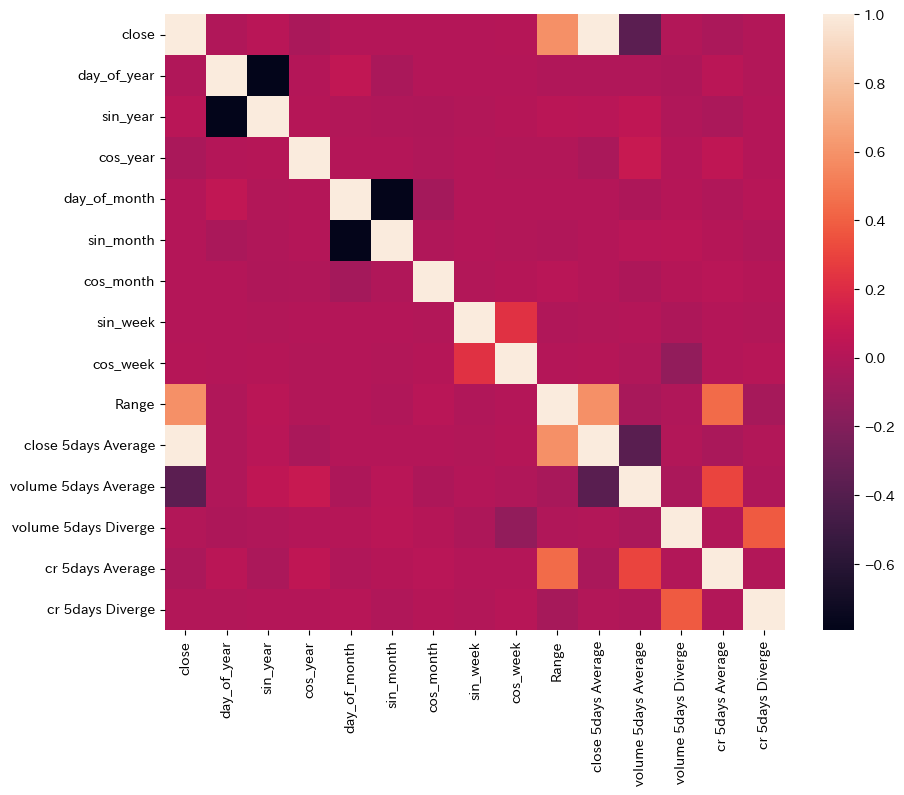

In [181]:
#ヒートマップで相関係数を確認
plt.figure(figsize=(10,8))
sns.heatmap(df_no_date.corr(), annot=False)
plt.show()

In [182]:
#VIFの計算
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif

df_no_date_close = df_no_date.drop('close', axis=1)

# Calculate VIF for each feature
vif_data = pd.DataFrame()
vif_data["feature"] = df_no_date_close.columns
vif_data["VIF"] = [vif(df_no_date_close.values, i) for i in range(df_no_date_close.shape[1])]

print(vif_data)

                 feature        VIF
0            day_of_year   7.554373
1               sin_year   5.809694
2               cos_year   2.887156
3           day_of_month   7.454628
4              sin_month   5.591285
5              cos_month   2.846484
6               sin_week   3.434592
7               cos_week   2.213355
8                  Range   5.293548
9    close 5days Average   4.758995
10  volume 5days Average   4.262537
11  volume 5days Diverge  10.291510
12      cr 5days Average   5.221201
13      cr 5days Diverge   3.367864


# ３．学習

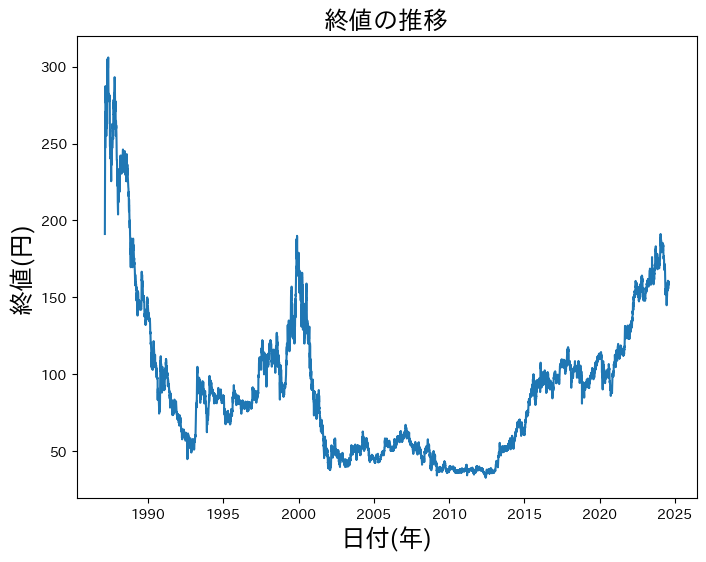

In [183]:
!pip install japanize-matplotlib
import japanize_matplotlib
import matplotlib.ticker as mticker

#closeの推移
plt.figure(figsize=(8,6))
plt.title('終値の推移', fontsize=18)
plt.xlabel('日付(年)', fontsize =18)
plt.ylabel('終値(円)', fontsize =18)
plt.plot(df['date'], df['close'])
plt.show()

In [184]:
X = df_no_date
y = df_no_date['close']

In [185]:
X = X.drop(['close'], axis=1)

In [186]:
#HoldOut方法で訓練用とテスト用に分割

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, shuffle=False)

In [187]:
#X_trainのインデックスに合わせてy_trainの列を削除
y_train = y_train.loc[X_train.index]

In [188]:
#特徴量選択アルゴリズム
from sklearn.ensemble import RandomForestRegressor

# ランダムフォレストモデルの構築
rf = RandomForestRegressor(random_state=0)

# モデルの学習
rf.fit(X_train, y_train)

# 特徴量の重要度を取得
feature_importances = rf.feature_importances_

# 特徴量の重要度をDataFrameに変換
feature_importances_df = pd.DataFrame({'feature': X_train.columns, 'importance': feature_importances})

# 重要度の高い順にソート
feature_importances_df = feature_importances_df.sort_values('importance', ascending=False)

# 重要度を表示
print(feature_importances_df)

                 feature  importance
9    close 5days Average    0.998205
12      cr 5days Average    0.000323
1               sin_year    0.000224
10  volume 5days Average    0.000217
13      cr 5days Diverge    0.000165
11  volume 5days Diverge    0.000164
8                  Range    0.000136
0            day_of_year    0.000121
2               cos_year    0.000118
5              cos_month    0.000102
4              sin_month    0.000091
3           day_of_month    0.000079
6               sin_week    0.000030
7               cos_week    0.000027


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/100
230/230 ━━━━━━━━━━━━━━━━━━━━ 28s 68ms/step - loss: 0.0442 - learning_rate: 0.0100
Epoch 2/100
230/230 ━━━━━━━━━━━━━━━━━━━━ 17s 55ms/step - loss: 0.0027 - learning_rate: 0.0100
Epoch 3/100
230/230 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.0018 - learning_rate: 0.0100
Epoch 4/100
230/230 ━━━━━━━━━━━━━━━━━━━━ 9s 40ms/step - loss: 0.0012 - learning_rate: 0.0100
Epoch 5/100
230/230 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 5.1819e-04 - learning_rate: 0.0100
Epoch 6/100
230/230 ━━━━━━━━━━━━━━━━━━━━ 10s 29ms/step - loss: 2.9684e-04 - learning_rate: 0.0100
Epoch 7/100
230/230 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - loss: 4.7507e-04 - learning_rate: 0.0100
Epoch 8/100
230/230 ━━━━━━━━━━━━━━━━━━━━ 8s 28ms/step - loss: 1.4452e-04 - learning_rate: 0.0100
Epoch 9/100
230/230 ━━━━━━━━━━━━━━━━━━━━ 9s 41ms/step - loss: 2.2542e-04 - learning_rate: 0.0100
Epoch 10/100
230/230 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 1.9061e-04 - learning_rate: 0.0100
Epoch 11/100
230/230 ━━━━━━━━━━━━━━━━━━━━ 

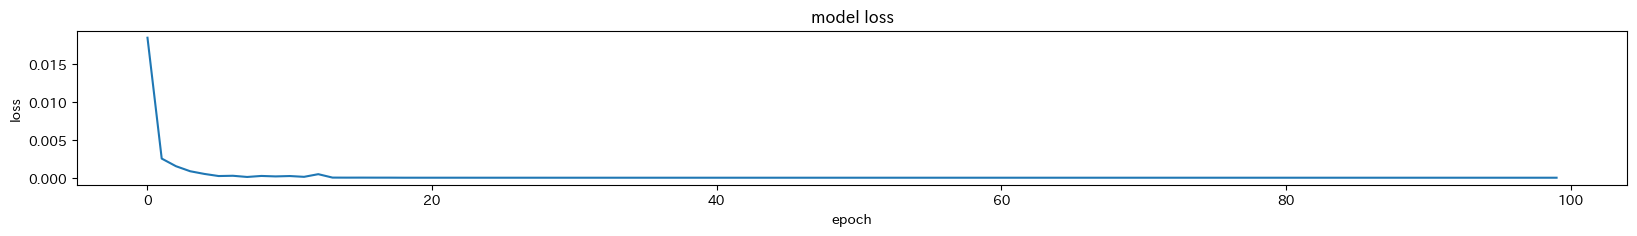

58/58 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step


In [189]:
#LSTMで学習
import keras
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.callbacks import EarlyStopping

#LSTMモデル構築
model = Sequential()
model.add(LSTM(128,return_sequences = True, input_shape=(X_train.shape[1], 1)))
model.add(LSTM(64, return_sequences = False))
model.add(Dense(25))
model.add(Dense(1))

optimizer = keras.optimizers.Adam(clipvalue=1.0, learning_rate=1e-2)
model.compile(optimizer=optimizer,loss='mean_squared_error')

# 学習率スケジューリングの設定
reduce_lr = ReduceLROnPlateau(monitor='loss', factor=0.1, patience=5, verbose=1,
                              min_lr=1e-6)

#早期停止
early_stopping = EarlyStopping(
    monitor='loss',  # 検証損失を監視
    patience=10,         # 改善がない場合にエポック数（ここでは10エポック）を待つ
    verbose=1,           # 結果を出力するかどうか
    restore_best_weights=True  # 最良の重みを復元するかどうか
)

#訓練用モデル構築
model.fit(X_train, y_train, batch_size = 32, epochs=100, callbacks=[reduce_lr, early_stopping])

#lossをプロット
plt.plot(model.history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

y_pred = model.predict(X_test)

In [190]:
np.isinf(y_pred).sum() # 無限大の数が含まれるか確認

0

# ４．モデルの評価

In [191]:
#モデルの評価
from sklearn.metrics import mean_squared_error, mean_squared_log_error, mean_absolute_error, r2_score

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("MSE:", mse)
print("RMSE:", rmse)
print("MAE:", mae)
print("R2:", r2)

MSE: 6.189188147591333e-05
RMSE: 0.007867139345144035
MAE: 0.005587346776215376
R2: 0.9942699638015677


In [192]:
#y_predをデータフレームに変換
#インデックスをy_testと揃える
#dfのdateの列を追加
y_pred = pd.DataFrame(y_pred, index=y_test.index, columns=['close'])
y_pred['date'] = df['date']

In [193]:
# y_predを元のスケールに戻す
y_pred_original = scaler.inverse_transform(df_no_date.loc[y_test.index])

# y_pred_originalからcloseの値を取り出す
y_pred_close = y_pred_original[:, df_no_date.columns.get_loc('close')]

# y_predを更新
y_pred['close'] = y_pred_close

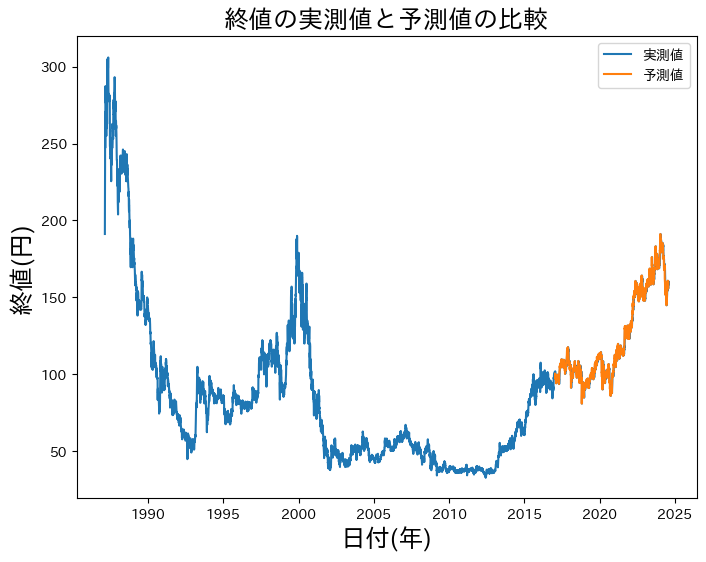

In [194]:
#予測値と実際の値をグラフで比較
plt.figure(figsize=(8,6))
plt.title('終値の実測値と予測値の比較', fontsize=18)
plt.xlabel('日付(年)', fontsize =18)
plt.ylabel('終値(円)', fontsize =18)
#x軸をdfのdateに設定
plt.xticks(rotation=0)
plt.plot(df['date'], df['close'], label='実測値')
plt.plot(y_pred['date'], y_pred['close'], label='予測値')
plt.legend()
plt.show()

# ５．GitHubにコードをプッシュ

In [1]:
!apt-get install git

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
git is already the newest version (1:2.34.1-1ubuntu1.11).
0 upgraded, 0 newly installed, 0 to remove and 49 not upgraded.


In [3]:
!git clone https://github.com/kaisei3506/LSTM-ML.git

Cloning into 'LSTM-ML'...
remote: Enumerating objects: 9, done.
remote: Counting objects: 100% (9/9), done.
remote: Compressing objects: 100% (5/5), done.
remote: Total 9 (delta 1), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (9/9), 4.51 KiB | 1.13 MiB/s, done.
Resolving deltas: 100% (1/1), done.


In [5]:
!cp /content/drive/MyDrive/Work-experience-assignments/work_experience_assignment.ipynb

cp: '/content/drive/MyDrive/業務体験課題/業務体験課題.ipynb' and '/content/drive/MyDrive/業務体験課題/業務体験課題.ipynb' are the same file
